# Proyek Analisis Data: Nama dataset
- Nama: Wahyu Budi Surastyo
- Email: qteen4j@gmail.com
- Id Dicoding: wahyubs

## Menentukan Pertanyaan Bisnis

- Bagaimana tren pertumbuhan user terdaftar dibandingkan dengan user casual?
- Bagaimana pengaruh musim terhadap penggunaan bike sharing?
- Bagaimana pengaruh suhu terhadap penggunaan bike sharing?

## Menyiapkan semua library yang dibutuhkan

In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [199]:
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [200]:
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### Mengecek Tipe Data

In [201]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Kolom dteday memiliki tipe data yang salah, tertulis object seharusnya datetime

In [202]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Kolom dteday memiliki tipe data yang salah, tertulis object seharusnya datetime

#### Mengecek Data Kosong/Missing

In [203]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [204]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Kedua dataset tidak memiliki missing value

#### Mengecek Data Duplikat

In [205]:
print("Jumlah Data Duplikat:", day_df.duplicated().sum())

Jumlah Data Duplikat: 0


In [206]:
print("Jumlah Data Duplikat:", hour_df.duplicated().sum())

Jumlah Data Duplikat: 0


Kedua dataset tidak memiliki data yang duplikat

#### Mengecek Parameter Statistik

In [207]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [208]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Secara sekilas tidak ada data yang nilainya perlu menjadi perhatian khusus pada kedua dataset

### Cleaning Data

#### Memperbaiki Tipe Data

In [209]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

Mengubah tipe data dari dteday menjadi datetime

In [210]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [211]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Kedua dataset telah memiliki tipe data yang sesuai

## Exploratory Data Analysis (EDA)

### Explorasi Data

In [212]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [230]:
weekday_names = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
x_day_df = day_df
x_day_df['weekday_nm'] = day_df['weekday'].apply(lambda x: weekday_names[x])
season_names = ['Spring', 'Summer', 'Fall', 'Winter']
x_day_df['season_nm'] = day_df['season'].apply(lambda x: season_names[x-1])
weather_names = ['Clear', 'Mist + Cloudy', 'Light Snow/Rain', 'Heavy Snow/Rain']
x_day_df['weathersit_nm'] = day_df['weathersit'].apply(lambda x: weather_names[x-1])
x_day_df['year_month'] = day_df['dteday'].dt.strftime('%Y-%m')
x_day_df['temp_val'] = ((39 + 8) * day_df['temp']) - 8
x_day_df['temp_val'] = day_df['temp_val'].round()
x_day_df.sample(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,hum,windspeed,casual,registered,cnt,weekday_nm,season_nm,weathersit_nm,year_month,temp_val
275,276,2011-10-03,4,0,10,0,1,1,2,0.384167,...,0.760833,0.083346,330,3240,3570,Mon,Winter,Mist + Cloudy,2011-10,10.0
670,671,2012-11-01,4,1,11,0,4,1,2,0.365833,...,0.581667,0.157346,466,5520,5986,Thu,Winter,Mist + Cloudy,2012-11,9.0
470,471,2012-04-15,2,1,4,0,0,0,1,0.606667,...,0.507917,0.225129,2846,4286,7132,Sun,Summer,Clear,2012-04,21.0
368,369,2012-01-04,1,1,1,0,3,1,2,0.107500,...,0.414583,0.184700,95,2273,2368,Wed,Spring,Mist + Cloudy,2012-01,-3.0
526,527,2012-06-10,2,1,6,0,0,0,1,0.726667,...,0.538333,0.133721,2224,4374,6598,Sun,Summer,Clear,2012-06,26.0
488,489,2012-05-03,2,1,5,0,4,1,2,0.560000,...,0.768333,0.133696,764,5657,6421,Thu,Summer,Mist + Cloudy,2012-05,18.0
666,667,2012-10-28,4,1,10,0,0,0,2,0.477500,...,0.694583,0.398008,998,3461,4459,Sun,Winter,Mist + Cloudy,2012-10,14.0
37,38,2011-02-07,1,0,2,0,1,1,1,0.271667,...,0.738333,0.045408,120,1592,1712,Mon,Spring,Clear,2011-02,5.0
169,170,2011-06-19,2,0,6,0,0,0,2,0.699167,...,0.666667,0.102000,1639,3105,4744,Sun,Summer,Mist + Cloudy,2011-06,25.0
241,242,2011-08-30,3,0,8,0,2,1,1,0.639167,...,0.548333,0.125008,775,4429,5204,Tue,Fall,Clear,2011-08,22.0


In [214]:
x_day_df.groupby(by="year_month").agg({
    "casual": ["max", "min", "mean", "std"],
    "registered": ["max", "min", "mean", "std"]
})

casual                               registered                     \
              max  min         mean         std        max   min         mean   
year_month                                                                      
2011-01       331    9    99.129032   72.503215       1844   416  1132.774194   
2011-02       694   47   222.928571  193.234827       2348   905  1499.035714   
2011-03      1424   46   413.741935  332.841501       2355   491  1652.225806   
2011-04      1965  121   744.866667  497.720787       3722   674  2417.466667   
2011-05      2355  255  1001.612903  525.722530       4238  2213  3379.709677   
2011-06      1920  513  1020.400000  458.669861       4488  2993  3763.333333   
2011-07      3065  562  1175.870968  665.455420       4220  2298  3383.516129   
2011-08      1914  226   930.387097  359.765449       4614   889  3479.000000   
2011-09      2521  118   884.833333  599.444173       4372  1689  3362.433333   
2011-10      2397   57   813.612903  617.780796       4267   570  3170.612903   
2011-11      1275   69   519.800000  374.552091       3891   935  2885.766667   
2011-12       706   50   272.516129  168.638048       3672   451  2544.354839   
2012-01      1070   67   289.322581  235.103295       4185  1234  2831.451613   
2012-02      1435   65   300.724138  262.347084       4546  1456  3255.724138   
2012-03      3155  203  1019.935484  701.334392       5893  2339  4298.612903   
2012-04      3252  120  1281.866667  843.933922       5950   907  4525.600000   
2012-05      3410  342  1426.935484  888.284562       6433  2501  4891.290323   
2012-06      2963  477  1443.133333  770.864527       6456  3594  5317.866667   
2012-07      2562  747  1345.322581  519.993166       6790  3195  5222.645161   
2012-08      2827  935  1393.451613  449.915462       6541  3341  5526.000000   
2012-09      3160  371  1459.266667  761.049273       6946  3197  5826.500000   
2012-10      3031    2  1114.129032  759.714540       6911    20  5300.096774   
2012-11      2290  123   700.300000  542.275166       5520  1470  4388.500000   
2012-12      1153    9   427.258065  244.896028       6055   432  3563.483871   

                         
                    std  
year_month               
2011-01      370.027540  
2011-02      331.779990  
2011-03      402.395387  
2011-04      809.575143  
2011-05      566.067911  
2011-06      439.945869  
2011-07      509.528074  
2011-08      755.445608  
2011-09      773.177576  
2011-10      810.102655  
2011-11      788.097915  
2011-12      947.709082  
2012-01      792.457689  
2012-02      839.594200  
2012-03      935.885487  
2012-04     1056.822551  
2012-05      963.828761  
2012-06      802.526817  
2012-07      935.328447  
2012-08      942.817833  
2012-09     1065.437089  
2012-10     1665.547865  
2012-11     1112.181539  
2012-12     1711.587409

In [215]:
x_day_df.groupby(by="season_nm").agg({
    "casual": ["max", "min", "mean", "std"],
    "registered": ["max", "min", "mean", "std"]
})

casual                               registered                    \
             max  min         mean         std        max  min         mean   
season_nm                                                                     
Fall        3160  118  1202.611702  595.975032       6917  889  4441.691489   
Spring      3155    9   334.928177  387.655561       5315  416  2269.204420   
Summer      3410  120  1106.097826  737.590829       6456  674  3886.233696   
Winter      3031    2   729.112360  606.318118       6946   20  3999.050562   

                        
                   std  
season_nm               
Fall       1304.626949  
Spring     1200.269751  
Summer     1353.375628  
Winter     1444.782557

In [216]:
x_day_df.groupby(by="weathersit_nm").agg({
    "casual": ["max", "min", "mean", "std"],
    "registered": ["max", "min", "mean", "std"]
})

casual                             registered                    \
                 max min        mean         std        max  min         mean   
weathersit_nm                                                                   
Clear           3410  15  964.030238  700.476488       6946  416  3912.755940   
Light Snow      1264   2  185.476190  260.975022       4324   20  1617.809524   
Mist + Cloudy   3155   9  687.352227  619.082767       6844  491  3348.510121   

                            
                       std  
weathersit_nm               
Clear          1533.347265  
Light Snow     1068.290954  
Mist + Cloudy  1463.566884

In [217]:
x_day_df.groupby(by="temp_val").agg({
    "cnt": "mean"
})

,cnt
temp_val,
-5.0,981.000000
-3.0,1590.000000
-2.0,1567.000000
-1.0,1479.250000
-0.0,1528.083333
1.0,1610.916667
2.0,1869.571429
3.0,1835.166667
4.0,2466.423077


In [232]:
x_day_df.groupby(['weekday_nm', 'holiday']).agg({
    'cnt': 'mean'
})

cnt
weekday_nm holiday             
Fri        0        4718.588235
           1        3247.000000
Mon        0        4398.866667
           1        3973.666667
Sat        0        4550.542857
Sun        0        4228.828571
Thu        0        4720.343137
           1        1960.000000
Tue        0        4544.621359
           1        1013.000000
Wed        0        4520.825243
           1        7403.000000

## Visualization & Explanatory Analysis

### 1. Bagaimana tren pertumbuhan user terdaftar dibandingkan dengan user casual?

In [218]:
monthly_growth_df = day_df.resample(rule='M', on='dteday').agg({
    'casual': 'sum',
    'registered': 'sum'
})
monthly_growth_df.index = monthly_growth_df.index.strftime('%Y-%m')
monthly_growth_df = monthly_growth_df.reset_index()
monthly_growth_df.rename(columns={
    'dteday': 'year_month',
    'casual': 'total_casual',
    'registered': 'total_registered'
}, inplace=True)
monthly_growth_df.head()

,year_month,total_casual,total_registered
0,2011-01,3073,35116
1,2011-02,6242,41973
2,2011-03,12826,51219
3,2011-04,22346,72524
4,2011-05,31050,104771


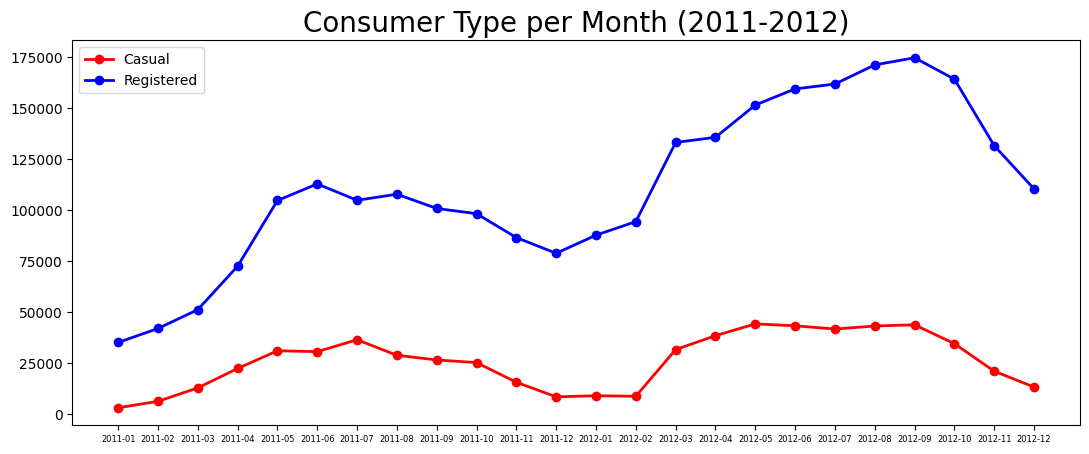

In [219]:
plt.figure(figsize=(13, 5)) 
plt.plot(monthly_growth_df["year_month"], monthly_growth_df["total_casual"], marker='o', linewidth=2, color="red")
plt.plot(monthly_growth_df["year_month"], monthly_growth_df["total_registered"], marker='o', linewidth=2, color="blue") 
plt.title("Consumer Type per Month (2011-2012)", loc="center", fontsize=20) 
plt.legend(['Casual', 'Registered']) 
plt.xticks(fontsize=6) 
plt.yticks(fontsize=10) 
plt.show()

### 2. Bagaimana pengaruh musim terhadap penggunaan bike sharing?

In [236]:
season_avg_df = day_df.groupby(by="season_nm").cnt.mean()
season_avg_df = season_avg_df.reset_index()
season_avg_df.rename(columns={
    'cnt': 'average_consumer'
}, inplace=True)
season_avg_df

,season_nm,average_consumer
0,Fall,5644.303191
1,Spring,2604.132597
2,Summer,4992.331522
3,Winter,4728.162921


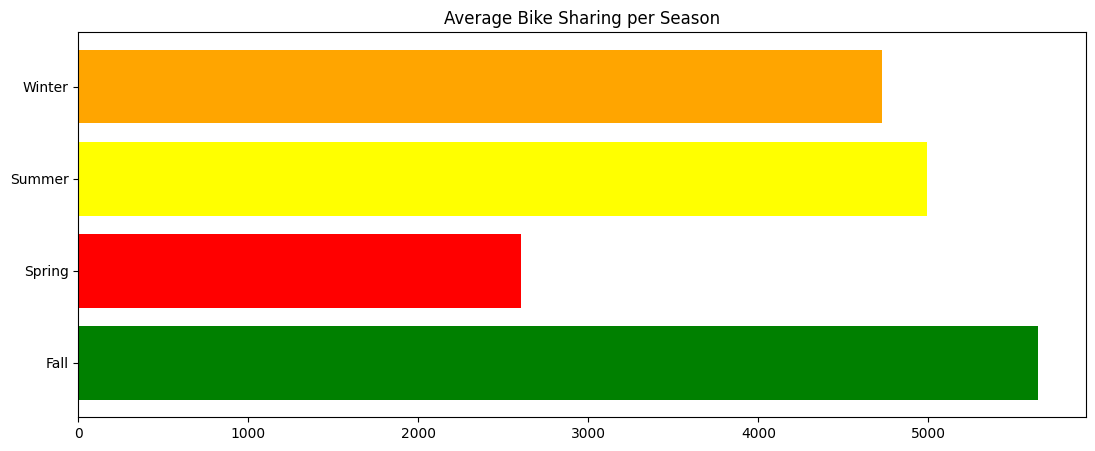

In [241]:
colors = ["green", "red", "yellow", "orange"]

plt.figure(figsize=(13, 5)) 
plt.barh(season_avg_df["season_nm"], season_avg_df["average_consumer"], color=colors)
plt.title("Average Bike Sharing per Season", loc="center", fontsize=12)
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.show()

### 3. Bagaimana pengaruh suhu terhadap penggunaan bike sharing?

In [225]:
temp_growth_df = day_df.groupby(by="temp_val").cnt.mean()
temp_growth_df = temp_growth_df.reset_index()
temp_growth_df.rename(columns={
    'cnt': 'average_consumer',
    'temp_val': 'temperature'
}, inplace=True)
temp_growth_df

,temperature,average_consumer
0,-5.0,981.000000
1,-3.0,1590.000000
2,-2.0,1567.000000
3,-1.0,1479.250000
4,-0.0,1528.083333
5,1.0,1610.916667
6,2.0,1869.571429
7,3.0,1835.166667
8,4.0,2466.423077
9,5.0,2908.222222


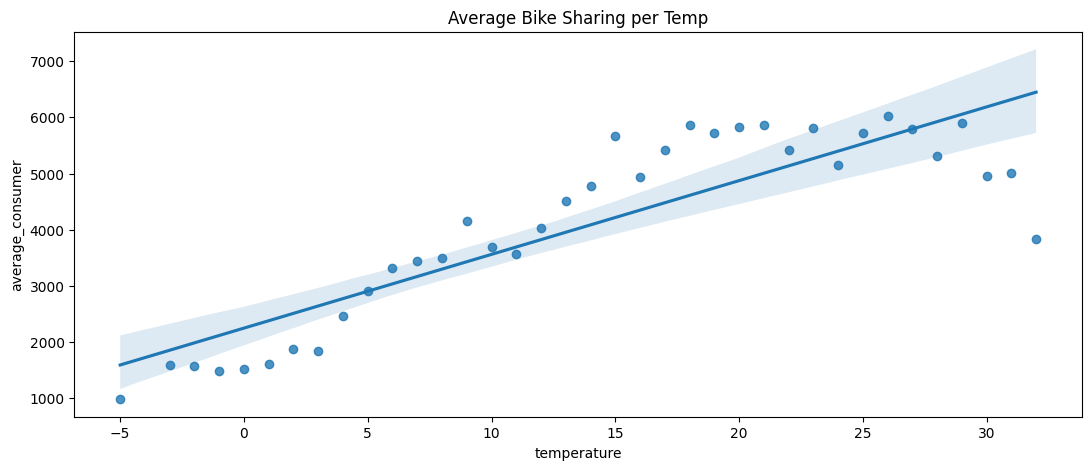

In [227]:
plt.figure(figsize=(13, 5)) 
# plt.bar(temp_growth_df["temperature"], temp_growth_df["average_consumer"], color="orange")
sns.regplot(x="temperature", y="average_consumer", data=temp_growth_df.sort_values(by="temperature", ascending=True))
plt.title("Average Bike Sharing per Temp", loc="center", fontsize=12)
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.show()

## Conclusion

1. Tren pertumbuhan pengguna bike sharing terus meningkat baik pengguna casual ataupun registered. Tapi bisa terlihat bahwa tren pertumbuhan pengguna registered lebih bagus daripada pengguna casual.
2. Musim cukup mempunyai pengaruh terhadap rtaa-rata penggunaan bike sharing. Musim semi atau Spring mempunyai rata-rata penggunaan terendah.
3. Terdapat korelasi yang cukup terlihat antara rata-rata penggunaan bike sharing dengan suhu/temperature udara saat itu. Semakin tinggi suhu udara, semakin banyak penggunaan bike sharing. Tapi untuk suhu 26 ke atas, mulai terlihat penurunan jumlah penggunaan rata-rata.

## Post Process for Dashboard

In [238]:
# Membuat dataframe baru yang berisi data-data yang akan diolah saja
important_day_df = day_df[['dteday', 'season_nm', 'weathersit_nm', 'temp_val', 'casual', 'registered', 'cnt']].copy()
important_day_df = important_day_df.reset_index()
important_day_df.sample(10)
important_day_df.to_csv("dashboard/important_day_df.csv", index=False)